# Data Science and Business Analytics 

### Exploratory Data Analysis - Sports - Dataset ‘Indian Premier League'

# Executed by: Debanka Das

#### Problem Statement

As a sports Analysts, find out the most successful teams, players and factors contributing win or loss of a team Suggest teams or players a company should endorse for its products. Importing the Python Libraries

In [1]:
#importing the required libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns




In [2]:
#Reading matches data
matchesData = pd.read_csv('matches.csv')

In [3]:
#printing head oh matches
matchesData.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [4]:
#Reading deliveries data
deliveriesData = pd.read_csv('deliveries.csv')

In [5]:
#printing head of deliveries
deliveriesData.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [6]:
matchesData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [7]:
matchesData.describe()

,id,season,dl_applied,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000,756.000000,756.000000
mean,1792.178571,2013.444444,0.025132,13.283069,3.350529
std,3464.478148,3.366895,0.156630,23.471144,3.387963
min,1.000000,2008.000000,0.000000,0.000000,0.000000
25%,189.750000,2011.000000,0.000000,0.000000,0.000000
50%,378.500000,2013.000000,0.000000,0.000000,4.000000
75%,567.250000,2016.000000,0.000000,19.000000,6.000000
max,11415.000000,2019.000000,1.000000,146.000000,10.000000


In [8]:
deliveriesData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

In [9]:
deliveriesData.describe()

,match_id,inning,over,ball,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
count,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000
mean,1802.252957,1.482952,10.162488,3.615587,0.000452,0.036721,0.004936,0.021136,0.004183,0.000056,1.246864,0.067032,1.313897
std,3472.322805,0.502074,5.677684,1.806966,0.021263,0.251161,0.116480,0.194908,0.070492,0.016709,1.608270,0.342553,1.605422
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,190.000000,1.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,379.000000,1.000000,10.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,567.000000,2.000000,15.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,11415.000000,5.000000,20.000000,9.000000,1.000000,5.000000,4.000000,5.000000,5.000000,5.000000,7.000000,7.000000,10.000000


In [10]:
#checking null values in each column
matchesData.isnull().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

In [11]:
#dropping umpire3 column as it contain missing values
matchesData = matchesData.drop(columns=["umpire3"],axis=1)

matchesData.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN


In [12]:
#finding column were cities are null 
matchesData[matchesData['city'].isnull()]['venue']

461    Dubai International Cricket Stadium
462    Dubai International Cricket Stadium
466    Dubai International Cricket Stadium
468    Dubai International Cricket Stadium
469    Dubai International Cricket Stadium
474    Dubai International Cricket Stadium
476    Dubai International Cricket Stadium
Name: venue, dtype: object

In [13]:
#filling missing city in the column
matchesData['city'].fillna('Dubai', inplace=True)

In [23]:
#finding column were umpire1 is null
matchesData[matchesData['umpire1'].isnull()]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN
753,11413,2019,Visakhapatnam,08/05/19,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN


In [24]:
match = matchesData.copy()

In [25]:
#filling data in the missing data
match.loc[4, 'umpire1'] = 'B Bauden'
match.loc[4, 'umpire2'] = 'S Ravi'

match.loc[753, 'umpire1'] = 'A Daar'
match.loc[753, 'umpire2'] = 'S.Sheifard'

In [26]:
matchesData = match.copy()

del match

In [27]:
#printing all the city hosted IPL matches
sorted(matchesData['city'].unique())

['Abu Dhabi',
 'Ahmedabad',
 'Bangalore',
 'Bengaluru',
 'Bloemfontein',
 'Cape Town',
 'Centurion',
 'Chandigarh',
 'Chennai',
 'Cuttack',
 'Delhi',
 'Dharamsala',
 'Dubai',
 'Durban',
 'East London',
 'Hyderabad',
 'Indore',
 'Jaipur',
 'Johannesburg',
 'Kanpur',
 'Kimberley',
 'Kochi',
 'Kolkata',
 'Mohali',
 'Mumbai',
 'Nagpur',
 'Port Elizabeth',
 'Pune',
 'Raipur',
 'Rajkot',
 'Ranchi',
 'Sharjah',
 'Visakhapatnam']

In [28]:
#changing Bengaluru to Bangalore
matchesData['city'] = matchesData['city'].replace('Bengaluru', 'Bangalore')

In [29]:
#printing all the team played IPL
sorted(matchesData['team1'].unique())

['Chennai Super Kings',
 'Deccan Chargers',
 'Delhi Capitals',
 'Delhi Daredevils',
 'Gujarat Lions',
 'Kings XI Punjab',
 'Kochi Tuskers Kerala',
 'Kolkata Knight Riders',
 'Mumbai Indians',
 'Pune Warriors',
 'Rajasthan Royals',
 'Rising Pune Supergiant',
 'Rising Pune Supergiants',
 'Royal Challengers Bangalore',
 'Sunrisers Hyderabad']

In [30]:
#changing Rising Pune Supergiants to Rising Pune Supergiant
matchesData = matchesData.replace('Rising Pune Supergiants', 'Rising Pune Supergiant')

In [31]:
sorted(matchesData['team1'].unique())

['Chennai Super Kings',
 'Deccan Chargers',
 'Delhi Capitals',
 'Delhi Daredevils',
 'Gujarat Lions',
 'Kings XI Punjab',
 'Kochi Tuskers Kerala',
 'Kolkata Knight Riders',
 'Mumbai Indians',
 'Pune Warriors',
 'Rajasthan Royals',
 'Rising Pune Supergiant',
 'Royal Challengers Bangalore',
 'Sunrisers Hyderabad']

In [32]:
sorted(matchesData['team2'].unique())

['Chennai Super Kings',
 'Deccan Chargers',
 'Delhi Capitals',
 'Delhi Daredevils',
 'Gujarat Lions',
 'Kings XI Punjab',
 'Kochi Tuskers Kerala',
 'Kolkata Knight Riders',
 'Mumbai Indians',
 'Pune Warriors',
 'Rajasthan Royals',
 'Rising Pune Supergiant',
 'Royal Challengers Bangalore',
 'Sunrisers Hyderabad']

In [33]:
matchesData.columns.values

array(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2'],
      dtype=object)

In [34]:
import warnings

In [35]:
warnings.simplefilter('ignore')

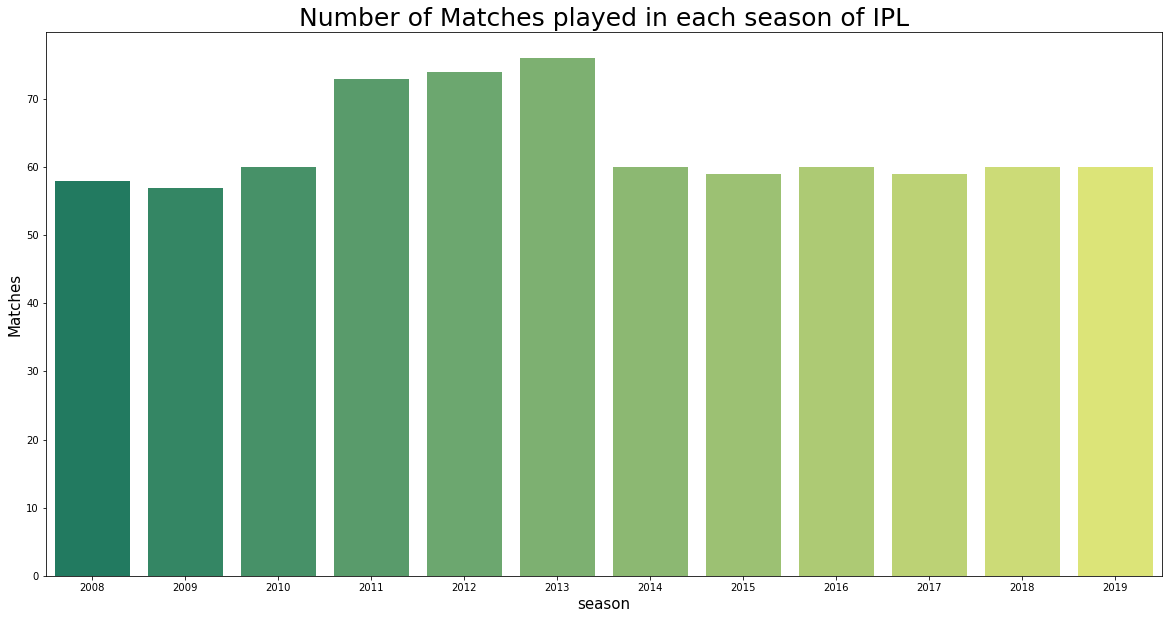

In [36]:
#plotting graph for matches played in each season of IPL
plt.figure(figsize = (20,10))
sns.countplot('season',data=matchesData, palette="summer")
plt.title("Number of Matches played in each season of IPL",fontsize=25)
plt.xlabel("season",fontsize=15)
plt.ylabel('Matches',fontsize=15)
plt.show()

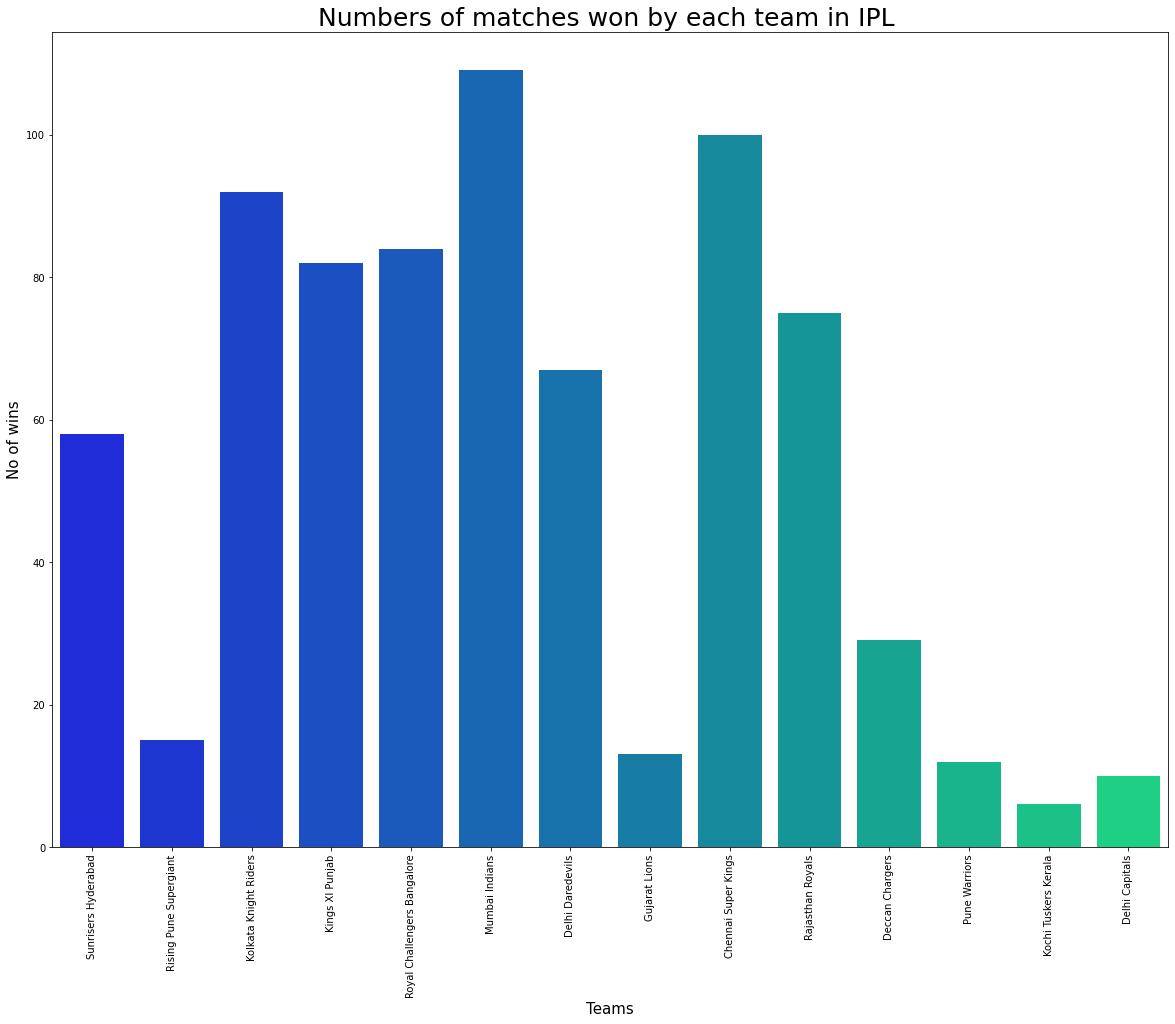

In [37]:
#plotting graph for matches won by each team
plt.figure(figsize = (20,15))
sns.countplot(x='winner',data=matchesData, palette='winter')
plt.title("Numbers of matches won by each team in IPL ",fontsize=25)
plt.xticks(rotation=90)
plt.xlabel("Teams",fontsize=15)
plt.ylabel("No of wins",fontsize=15)
plt.show()

In [38]:
matchesData['win_by']=np.where(matchesData['win_by_runs']>0,'Bat first','Bowl first')

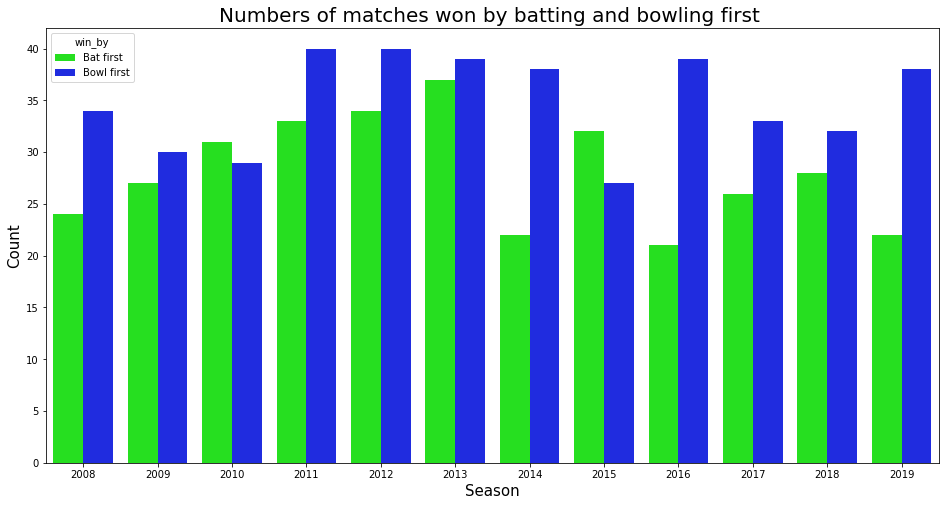

In [39]:
#plotting the graphy of bat first and bowl first in season
plt.figure(figsize = (16,8))
sns.countplot('season',hue='win_by',data=matchesData,palette='hsv')
plt.title("Numbers of matches won by batting and bowling first ",fontsize=20)
plt.xlabel("Season",fontsize=15)
plt.ylabel("Count",fontsize=15)
plt.show()

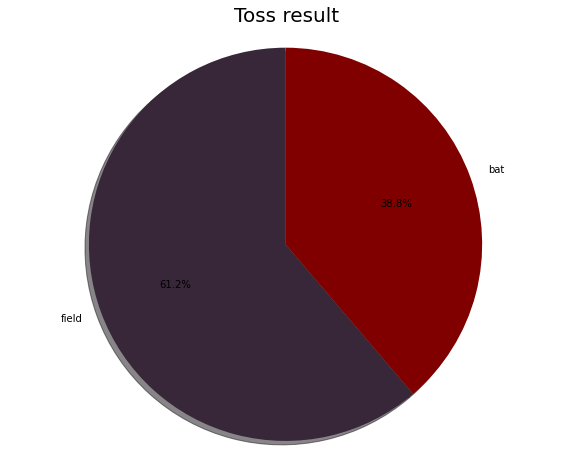

In [40]:
# we will plot pie chart on Toss decision
Toss=matchesData.toss_decision.value_counts()
labels=np.array(Toss.index)
sizes = Toss.values
colors = ['#382738', '#800000']
plt.figure(figsize = (10,8))
plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True,startangle=90)
plt.title('Toss result',fontsize=20)
plt.axis('equal')
plt.show()

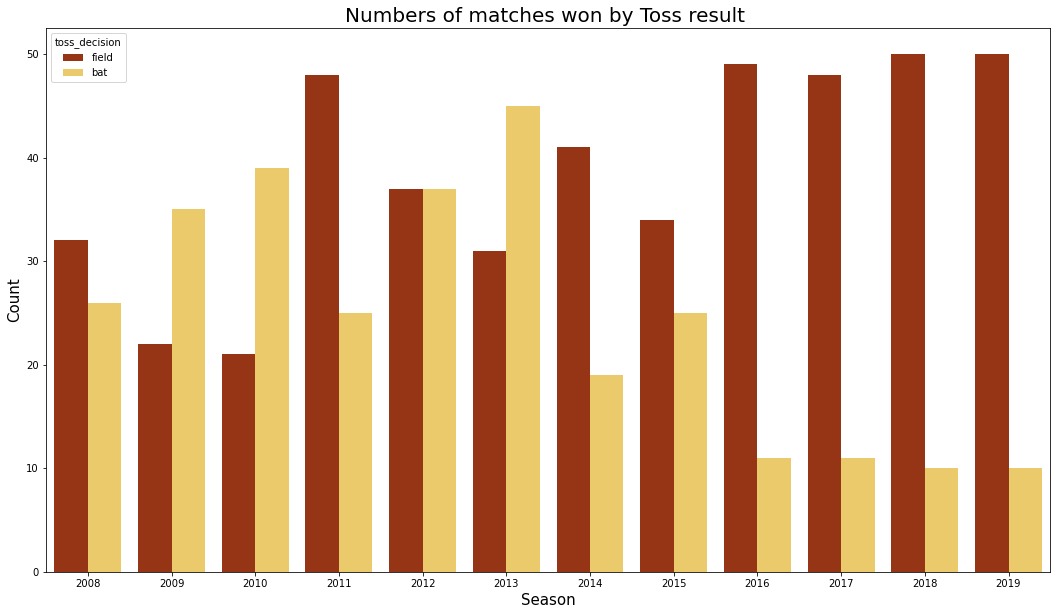

In [41]:
# we will plot graph on Numbers of matches won by Toss result
plt.figure(figsize = (18,10))
sns.countplot('season',hue='toss_decision',data=matchesData,palette='afmhot')
plt.title("Numbers of matches won by Toss result ",fontsize=20)
plt.xlabel("Season",fontsize=15)
plt.ylabel("Count",fontsize=15)
plt.show()

In [42]:
#finding played match vs wins match for each team
team_played_wins = pd.DataFrame((team, matchesData[(matchesData['team1']==team) | (matchesData['team2']==team)].shape[0], matchesData[matchesData['winner']==team].shape[0]) for team in matchesData['team1'].unique())
team_played_wins.columns = ['Team', 'Played_match', 'Wins_match']
team_played_wins = team_played_wins.sort_values(by='Played_match', ascending=False)
team_played_wins

,Team,Played_match,Wins_match
1,Mumbai Indians,187,109
4,Royal Challengers Bangalore,180,84
5,Kolkata Knight Riders,178,92
7,Kings XI Punjab,176,82
8,Chennai Super Kings,164,100
6,Delhi Daredevils,161,67
9,Rajasthan Royals,147,75
0,Sunrisers Hyderabad,108,58
10,Deccan Chargers,75,29
12,Pune Warriors,46,12


In [43]:
#wins per seasons for each team
wins_per_season = matchesData.groupby("season")["winner"].value_counts()
wins_per_season

season  winner                     
2008    Rajasthan Royals               13
        Kings XI Punjab                10
        Chennai Super Kings             9
        Delhi Daredevils                7
        Mumbai Indians                  7
                                       ..
2019    Kings XI Punjab                 6
        Kolkata Knight Riders           6
        Sunrisers Hyderabad             6
        Rajasthan Royals                5
        Royal Challengers Bangalore     5
Name: winner, Length: 100, dtype: int64

In [44]:
# we will print winner season wise
final_matches=matchesData.drop_duplicates(subset=['season'], keep='last')

final_matches[['season','winner']].reset_index(drop=True).sort_values('season')

,season,winner
1,2008,Rajasthan Royals
2,2009,Deccan Chargers
3,2010,Chennai Super Kings
4,2011,Chennai Super Kings
5,2012,Kolkata Knight Riders
6,2013,Mumbai Indians
7,2014,Kolkata Knight Riders
8,2015,Mumbai Indians
9,2016,Sunrisers Hyderabad
0,2017,Mumbai Indians


In [45]:
# we will print number of season won by teams
final_matches["winner"].value_counts()

Mumbai Indians           4
Chennai Super Kings      3
Kolkata Knight Riders    2
Sunrisers Hyderabad      1
Rajasthan Royals         1
Deccan Chargers          1
Name: winner, dtype: int64

In [46]:
# we will print man of the match in finals
final_matches[['season','winner','player_of_match']].reset_index(drop=True)

,season,winner,player_of_match
0,2017,Mumbai Indians,KH Pandya
1,2008,Rajasthan Royals,YK Pathan
2,2009,Deccan Chargers,A Kumble
3,2010,Chennai Super Kings,SK Raina
4,2011,Chennai Super Kings,M Vijay
5,2012,Kolkata Knight Riders,MS Bisla
6,2013,Mumbai Indians,KA Pollard
7,2014,Kolkata Knight Riders,MK Pandey
8,2015,Mumbai Indians,RG Sharma
9,2016,Sunrisers Hyderabad,BCJ Cutting


In [47]:
# we will print toss winner, toss decision, winner in final matches.
final_matches[['season','toss_winner','toss_decision','winner']].reset_index(drop=True)

,season,toss_winner,toss_decision,winner
0,2017,Mumbai Indians,bat,Mumbai Indians
1,2008,Rajasthan Royals,field,Rajasthan Royals
2,2009,Royal Challengers Bangalore,field,Deccan Chargers
3,2010,Chennai Super Kings,bat,Chennai Super Kings
4,2011,Chennai Super Kings,bat,Chennai Super Kings
5,2012,Chennai Super Kings,bat,Kolkata Knight Riders
6,2013,Mumbai Indians,bat,Mumbai Indians
7,2014,Kolkata Knight Riders,field,Kolkata Knight Riders
8,2015,Chennai Super Kings,field,Mumbai Indians
9,2016,Sunrisers Hyderabad,bat,Sunrisers Hyderabad


In [48]:
#adding id, season and winner in deliveries data
season_data=matchesData[['id','season','winner']]

complete_del_data=deliveriesData.merge(season_data,how='inner',left_on='match_id',right_on='id')

In [49]:
# we will print numbers of fours hit by team
four_data=complete_del_data[complete_del_data['batsman_runs']==4]
four_data.groupby('batting_team')['batsman_runs'].agg([('runs by fours','sum'),('fours','count')])

,runs by fours,fours
batting_team,,
Chennai Super Kings,8772,2193
Deccan Chargers,3828,957
Delhi Capitals,968,242
Delhi Daredevils,8632,2158
Gujarat Lions,1840,460
Kings XI Punjab,9832,2458
Kochi Tuskers Kerala,680,170
Kolkata Knight Riders,9736,2434
Mumbai Indians,10352,2588


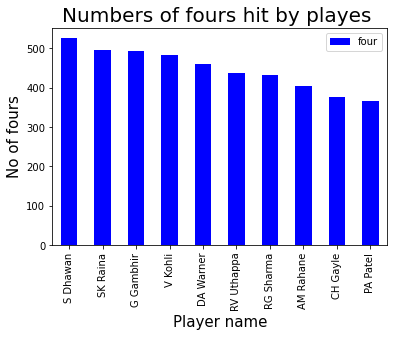

In [50]:
# we will plot graph on four hit by players
batsman_four=four_data.groupby('batsman')['batsman_runs'].agg([('four','count')]).reset_index().sort_values('four',ascending=0)
ax=batsman_four.iloc[:10,:].plot('batsman','four',kind='bar',color="blue")
plt.title("Numbers of fours hit by playes ",fontsize=20)
plt.xticks(rotation=90)
plt.xlabel("Player name",fontsize=15)
plt.ylabel("No of fours",fontsize=15)
plt.show()

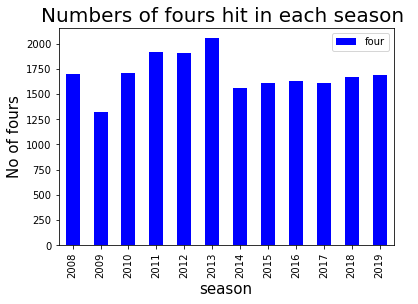

In [51]:
# we will plot graph on no of four hit in each season
ax=four_data.groupby('season')['batsman_runs'].agg([('four','count')]).reset_index().plot('season','four',kind='bar',color = 'blue')
plt.title("Numbers of fours hit in each season ",fontsize=20)
plt.xticks(rotation=90)
plt.xlabel("season",fontsize=15)
plt.ylabel("No of fours",fontsize=15)
plt.show()

In [52]:
# we will print no of sixes hit by team
six_data=complete_del_data[complete_del_data['batsman_runs']==6]
six_data.groupby('batting_team')['batsman_runs'].agg([('runs by six','sum'),('sixes','count')])

,runs by six,sixes
batting_team,,
Chennai Super Kings,5838,973
Deccan Chargers,2400,400
Delhi Capitals,522,87
Delhi Daredevils,4806,801
Gujarat Lions,930,155
Kings XI Punjab,5856,976
Kochi Tuskers Kerala,318,53
Kolkata Knight Riders,5580,930
Mumbai Indians,6576,1096


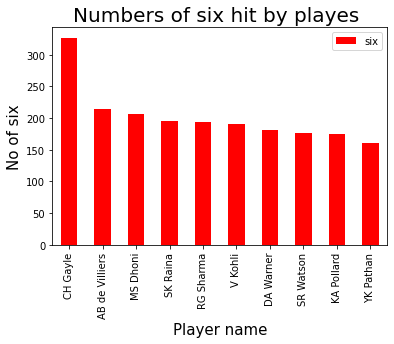

In [53]:
# we will plot graph of six hit by players
batsman_six=six_data.groupby('batsman')['batsman_runs'].agg([('six','count')]).reset_index().sort_values('six',ascending=0)
ax=batsman_six.iloc[:10,:].plot('batsman','six',kind='bar',color='red')
plt.title("Numbers of six hit by playes ",fontsize=20)
plt.xticks(rotation=90)
plt.xlabel("Player name",fontsize=15)
plt.ylabel("No of six",fontsize=15)
plt.show()

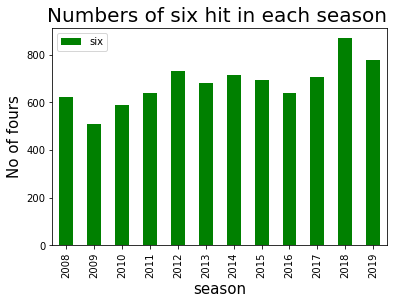

In [54]:
# we will plot graph on no of six hit in each season
ax=six_data.groupby('season')['batsman_runs'].agg([('six','count')]).reset_index().plot('season','six',kind='bar',color = 'green')
plt.title("Numbers of six hit in each season ",fontsize=20)
plt.xticks(rotation=90)
plt.xlabel("season",fontsize=15)
plt.ylabel("No of fours",fontsize=15)
plt.show()

In [55]:
# We will print the top 10 leading run scorer in IPL
batsman_score=deliveriesData.groupby('batsman')['batsman_runs'].agg(['sum']).reset_index().sort_values('sum',ascending=False).reset_index(drop=True)
batsman_score=batsman_score.rename(columns={'sum':'batsman_runs'})
top10batsmens=batsman_score.iloc[:10,:]
top10batsmens

,batsman,batsman_runs
0,V Kohli,5434
1,SK Raina,5415
2,RG Sharma,4914
3,DA Warner,4741
4,S Dhawan,4632
5,CH Gayle,4560
6,MS Dhoni,4477
7,RV Uthappa,4446
8,AB de Villiers,4428
9,G Gambhir,4223


<AxesSubplot:>

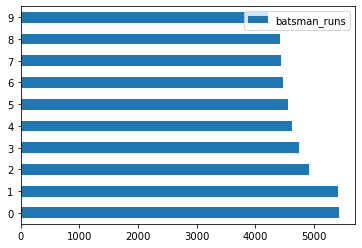

In [56]:
#plotting player made most runs in the IPL
top10batsmens.plot(kind='barh')

In [57]:
wicket_data=deliveriesData.dropna(subset=['dismissal_kind'])
wicket_data=wicket_data[~wicket_data['dismissal_kind'].isin(['run out','retired hurt','obstructing the field'])]

# we will print ipl most wicket taking bowlers

top10bowlers=wicket_data.groupby('bowler')['dismissal_kind'].agg(['count']).reset_index().sort_values('count',ascending=False).reset_index(drop=True).iloc[:10,:]
top10bowlers

,bowler,count
0,SL Malinga,170
1,A Mishra,156
2,Harbhajan Singh,150
3,PP Chawla,149
4,DJ Bravo,147
5,B Kumar,133
6,R Ashwin,125
7,SP Narine,122
8,UT Yadav,119
9,RA Jadeja,108


<AxesSubplot:>

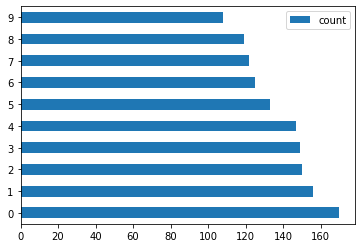

In [58]:
#plotting player taken most wicket in the IPL
top10bowlers.plot(kind='barh')

## TASK_COMPLETED

# THANK YOU